<h1>Homework week 5 and 6 - Fundamentals of Machine Learning</h2>

Open libraries and download the Fifa dataset (Netherlands vs Argentine tonight, woohoo!) [Edit on 20-12: woohoo...]

In [1674]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans


# Open dataset
df = pd.read_csv("CompleteDataset.csv")
pd.set_option("display.max_columns", None)
df

C:\Users\jvanw\AppData\Local\Temp\ipykernel_10660\3696253364.py:18: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CompleteDataset.csv")


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,€1K,755,24,16,38,26,12,23,14,13,12,5,12,46,47,49,42,48,10,9,31,21,7,9,17,6,40,19,19,10,32,28,11,50,26,6,NaN,NaN,NaN,NaN,NaN,237463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,€1K,832,25,44,35,44,22,44,11,12,11,11,11,39,50,39,50,37,12,16,51,13,16,14,22,13,51,12,13,13,25,32,12,47,17,12,NaN,NaN,NaN,NaN,NaN,11728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.s

In [1675]:
pd.set_option("display.max_columns", None)

df.dropna(inplace=True)

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15746 non-null  int64  
 1   Name                 15746 non-null  object 
 2   Age                  15746 non-null  int64  
 3   Photo                15746 non-null  object 
 4   Nationality          15746 non-null  object 
 5   Flag                 15746 non-null  object 
 6   Overall              15746 non-null  int64  
 7   Potential            15746 non-null  int64  
 8   Club                 15746 non-null  object 
 9   Club Logo            15746 non-null  object 
 10  Value                15746 non-null  object 
 11  Wage                 15746 non-null  object 
 12  Special              15746 non-null  int64  
 13  Acceleration         15746 non-null  object 
 14  Aggression           15746 non-null  object 
 15  Agility              15746 non-null 

Select seven variables to cut down the size:

In [1676]:
dfSubset = df[["Dribbling", "Acceleration", "Balance", "Agility", "Stamina", "Shot power", "Reactions", "Preferred Positions"]]
dfSubset

dfSubset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dribbling            15746 non-null  object
 1   Acceleration         15746 non-null  object
 2   Balance              15746 non-null  object
 3   Agility              15746 non-null  object
 4   Stamina              15746 non-null  object
 5   Shot power           15746 non-null  object
 6   Reactions            15746 non-null  object
 7   Preferred Positions  15746 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


By doing df.info() here above, is seems like that:
- Every value is a number that is now defined as an object. This does not sound right.

This means that we have to convert objects to float. But first, we need to drop all values that are greater than two (like "70+9").

In [1677]:
# list = ["Dribbling", "Acceleration", "Balance", "Agility", "Stamina", "Shot power", "Reactions"]

# for item in list:
#     df[item].info()
#     df[item] = df[item][df[item].str.len() <= 2]
#     df[item] = df[item].astype("string").astype(int)

In [1678]:
# Remove every value that is greater than two characters.
dfSubset = dfSubset[dfSubset["Dribbling"].str.len() <= 2]
dfSubset = dfSubset[dfSubset["Acceleration"].str.len() <= 2]
dfSubset = dfSubset[dfSubset["Balance"].str.len() <= 2]
dfSubset = dfSubset[dfSubset["Agility"].str.len() <= 2]
dfSubset = dfSubset[dfSubset["Stamina"].str.len() <= 2]
dfSubset = dfSubset[dfSubset["Shot power"].str.len() <= 2]
dfSubset = dfSubset[dfSubset["Reactions"].str.len() <= 2]

dfSubset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15405 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dribbling            15405 non-null  object
 1   Acceleration         15405 non-null  object
 2   Balance              15405 non-null  object
 3   Agility              15405 non-null  object
 4   Stamina              15405 non-null  object
 5   Shot power           15405 non-null  object
 6   Reactions            15405 non-null  object
 7   Preferred Positions  15405 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


Now, let's convert the objects now to string (yup, hardcoded. .astype(str) does apparently not work).

In [1679]:
dfSubset["Dribbling"] = dfSubset["Dribbling"].astype("string")
dfSubset["Acceleration"] = dfSubset["Acceleration"].astype("string")
dfSubset["Balance"] = dfSubset["Balance"].astype("string")
dfSubset["Agility"] = dfSubset["Agility"].astype("string")
dfSubset["Stamina"] = dfSubset["Stamina"].astype("string")
dfSubset["Shot power"] = dfSubset["Shot power"].astype("string")
dfSubset["Reactions"] = dfSubset["Reactions"].astype("string")
dfSubset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15405 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dribbling            15405 non-null  string
 1   Acceleration         15405 non-null  string
 2   Balance              15405 non-null  string
 3   Agility              15405 non-null  string
 4   Stamina              15405 non-null  string
 5   Shot power           15405 non-null  string
 6   Reactions            15405 non-null  string
 7   Preferred Positions  15405 non-null  object
dtypes: object(1), string(7)
memory usage: 1.1+ MB


And now convert to integer.

In [1680]:
dfSubset["Dribbling"] = dfSubset["Dribbling"].astype(int)
dfSubset["Acceleration"] = dfSubset["Acceleration"].astype(int)
dfSubset["Balance"] = dfSubset["Balance"].astype(int)
dfSubset["Agility"] = dfSubset["Agility"].astype(int)
dfSubset["Stamina"] = dfSubset["Stamina"].astype(int)
dfSubset["Shot power"] = dfSubset["Shot power"].astype(int)
dfSubset["Reactions"] = dfSubset["Reactions"].astype(int)

# dfSubset["Dribbling"] = dfSubset["Dribbling"].astype("int64")
# dfSubset["Acceleration"] = dfSubset["Acceleration"].astype("int64")
# dfSubset["Balance"] = dfSubset["Balance"].astype("int64")
# dfSubset["Agility"] = dfSubset["Agility"].astype("int64")
# dfSubset["Stamina"] = dfSubset["Stamina"].astype("int64")
# dfSubset["Shot power"] = dfSubset["Shot power"].astype("int64")
# dfSubset["Reactions"] = dfSubset["Reactions"].astype("int64")
dfSubset.info()
dfSubset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15405 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dribbling            15405 non-null  int32 
 1   Acceleration         15405 non-null  int32 
 2   Balance              15405 non-null  int32 
 3   Agility              15405 non-null  int32 
 4   Stamina              15405 non-null  int32 
 5   Shot power           15405 non-null  int32 
 6   Reactions            15405 non-null  int32 
 7   Preferred Positions  15405 non-null  object
dtypes: int32(7), object(1)
memory usage: 661.9+ KB


,Dribbling,Acceleration,Balance,Agility,Stamina,Shot power,Reactions,Preferred Positions
0,91,89,63,89,92,94,96,ST LW
1,97,92,95,90,73,85,95,RW
2,96,94,82,96,78,80,88,LW
3,86,88,60,86,89,87,93,ST
5,85,79,80,78,79,88,91,ST
...,...,...,...,...,...,...,...,...
17974,29,66,48,45,52,30,48,CB
17975,44,25,52,40,30,52,47,CM
17978,37,66,77,60,33,42,54,ST
17979,41,57,74,58,49,43,49,CM


In [1681]:
# df["Preferred Positions"]

In [1682]:
# Add the Preferred Positions column to the subset
# dfSubset["PreferredPositions"] = df[["Preferred Positions"]]
# dfSubset

<h1>Cleaning is done, now starting with the exploratory data analysis</h1>

Make a pairplot to see possible correlations between variables:

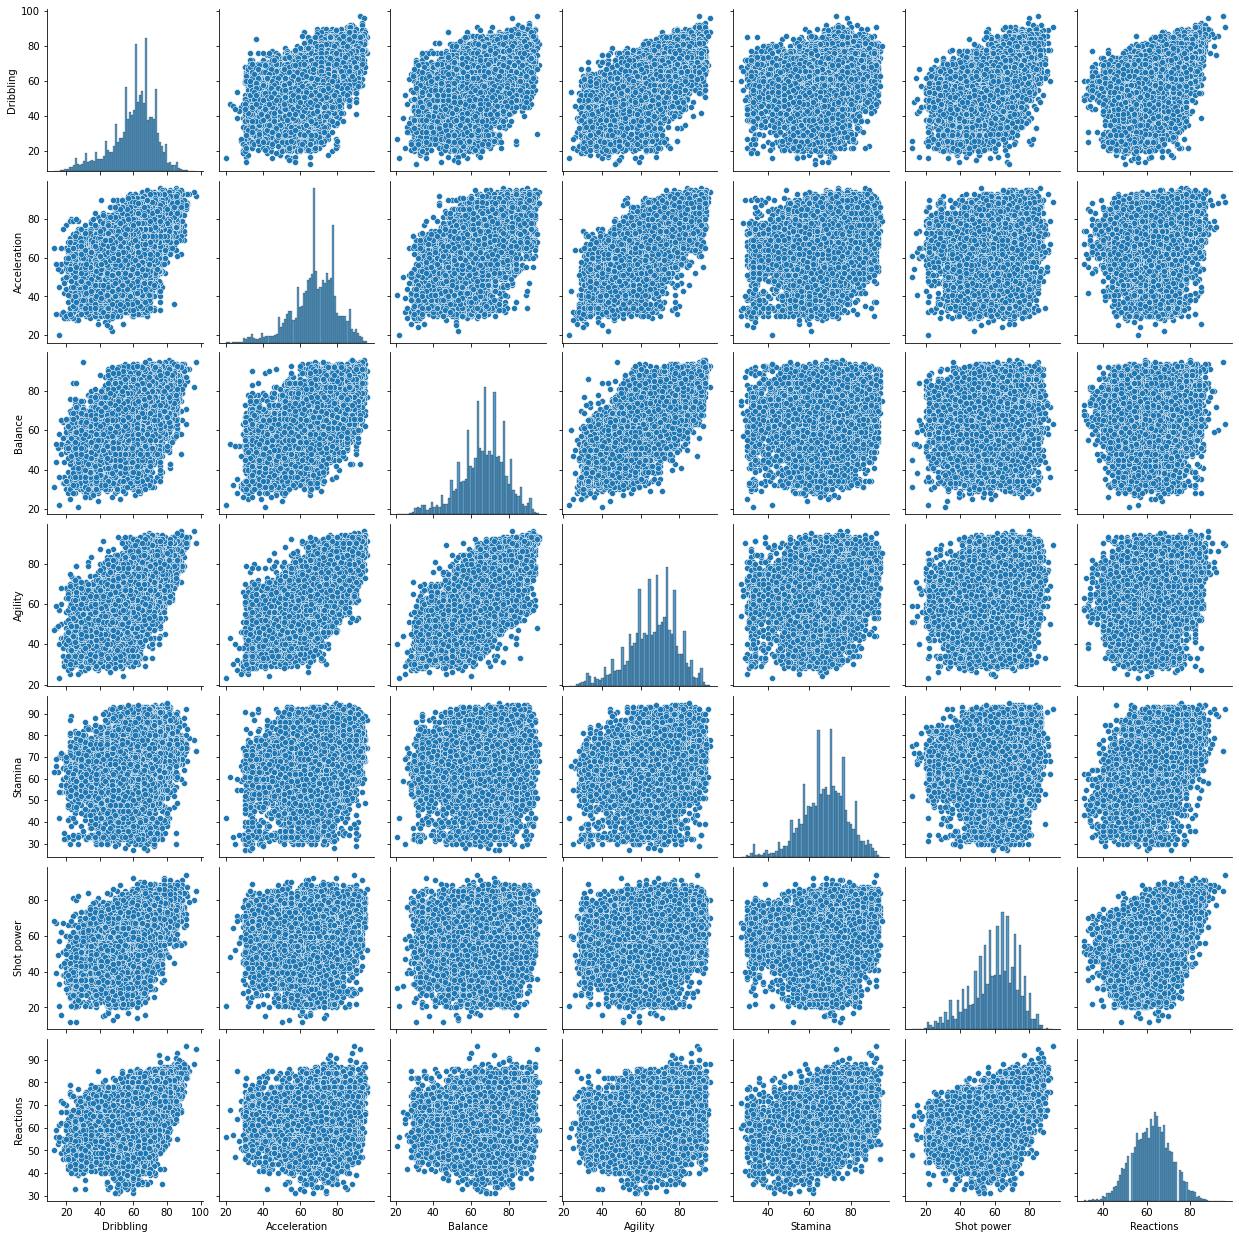

In [1683]:
sns.pairplot(dfSubset)

plt.show() #using Matplotlib to show the plot

And now make a correlation between the variables I chose, also to see correlations between variables:

In [1684]:
corr = dfSubset.corr()
corr.style.background_gradient(cmap="coolwarm")

,Dribbling,Acceleration,Balance,Agility,Stamina,Shot power,Reactions
Dribbling,1.000000,0.555443,0.497659,0.662025,0.263075,0.596058,0.457539
Acceleration,0.555443,1.000000,0.581940,0.718253,0.279505,0.211664,0.130851
Balance,0.497659,0.581940,1.000000,0.706037,0.143227,0.166122,0.095070
Agility,0.662025,0.718253,0.706037,1.000000,0.278215,0.328351,0.250417
Stamina,0.263075,0.279505,0.143227,0.278215,1.000000,0.252498,0.426016
Shot power,0.596058,0.211664,0.166122,0.328351,0.252498,1.000000,0.499946
Reactions,0.457539,0.130851,0.095070,0.250417,0.426016,0.499946,1.000000


We can see in the headmap above that agility has a medium-high correlation with dribbling, acceleration and balance.

And now make another type of heatmap to see the correlation between the different variables (just because I was curious about how this one should look):

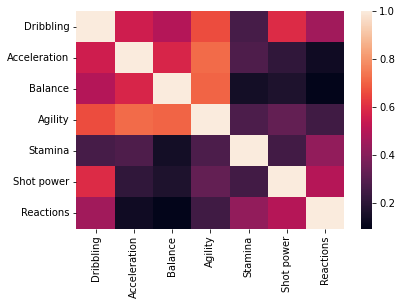

In [1685]:
sns.heatmap(dfSubset.corr())
plt.show()

Hmmm, it is a bit difficult to see the correlations between the variables due to the similar looking colours. 

Make a histplot to see how the values of the variable compare with each other:

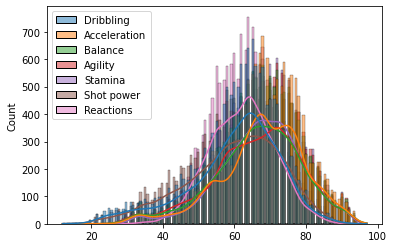

In [1686]:
sns.histplot(dfSubset[["Dribbling", "Acceleration", "Balance", "Agility", "Stamina", "Shot power", "Reactions"]], kde=True)
plt.show()

We can see that reactions has a high peak, but that it stands out from the rest. It looks like that the other variables are sort of grouped together.

Calculate the mean, median and standard deviation of the "Agility" variable. So: central tendency and variation:

The mean agilities are: 66.19844206426485
The median agilities are: 67.0
The standard deviation agilities are: 12.511972488022675


c:\Users\jvanw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


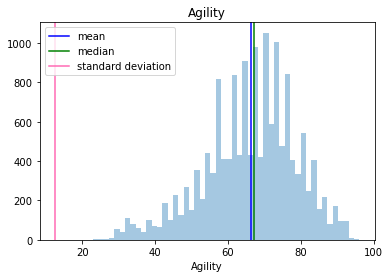

In [1687]:
meanAgility = dfSubset["Agility"].mean()
medianAgility = dfSubset["Agility"].median()
standardDeviation = np.std(dfSubset["Agility"])

print(f"The mean agilities are: {meanAgility}")
print(f"The median agilities are: {medianAgility}")
print(f"The standard deviation agilities are: {standardDeviation}")

sns.distplot(dfSubset["Agility"], kde=False)
plt.title("Agility")
plt.axvline(meanAgility, 0, 100, color='blue', label='mean')
plt.axvline(medianAgility, 0, 100, color='green', label='median')
plt.axvline(standardDeviation, 0, 100, color='hotpink', label='standard deviation')
plt.legend()
plt.show()

Description about the plot above:

- Normality: the normality is present. The datapoints start around 30 and are centered between 55 and 75.
- Variation: variation is present. All datapoints lie between 25 and 90 and most lie between 55 and 75.
- Modality: there are a lot of peaks. However, there's a big peak between 70 and 75.
- Skewness: no skew is present.
- Outliers: no outliers are present.

Make a stripplot to see the best positions for the acceleration and agility variables, because I am curious what the optimal positions for them both will be.

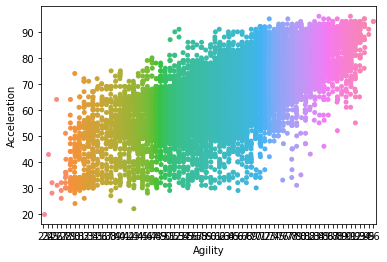

In [1688]:
sns.stripplot(y=dfSubset["Acceleration"], x=dfSubset["Agility"], data=dfSubset)
plt.show()

Apparently, the amount of positions is too much to display nicely in the stripplot.

<h1>Predictive model (part 2 of of the homework)</h1>

First, split (to make a list) and then explode the preferred positions column, so that the first variable from this column remains.

In [1689]:
dfSubset["Preferred Positions"] = dfSubset["Preferred Positions"].str.split()
dfSubset["Preferred Positions"] = dfSubset["Preferred Positions"].explode(["Preferred Positions"])

dfSubset

,Dribbling,Acceleration,Balance,Agility,Stamina,Shot power,Reactions,Preferred Positions
0,91,89,63,89,92,94,96,ST
1,97,92,95,90,73,85,95,LW
2,96,94,82,96,78,80,88,RW
3,86,88,60,86,89,87,93,LW
5,85,79,80,78,79,88,91,ST
...,...,...,...,...,...,...,...,...
17974,29,66,48,45,52,30,48,RM
17975,44,25,52,40,30,52,47,RW
17978,37,66,77,60,33,42,54,LM
17979,41,57,74,58,49,43,49,RM


Now make dummies of the preferred positions column, so that it is easier to use this categorical variable when comparing to the seven selected numerical columns.

In [1690]:
dummies = pd.get_dummies(dfSubset["Preferred Positions"])
dfSubset = pd.concat([dfSubset, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
dfSubset

,Dribbling,Acceleration,Balance,Agility,Stamina,Shot power,Reactions,Preferred Positions,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,91,89,63,89,92,94,96,ST,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,97,92,95,90,73,85,95,LW,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,96,94,82,96,78,80,88,RW,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,86,88,60,86,89,87,93,LW,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,85,79,80,78,79,88,91,ST,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,29,66,48,45,52,30,48,RM,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17975,44,25,52,40,30,52,47,RW,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17978,37,66,77,60,33,42,54,LM,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17979,41,57,74,58,49,43,49,RM,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Check now the amount of the seven different positions:

In [1691]:
count = dfSubset["Preferred Positions"].value_counts()
count

CB     2064
CM     1962
ST     1719
CDM    1627
LM     1543
RM     1490
CAM    1392
RB     1144
LB     1132
LW      450
RW      442
CF      215
RWB     117
LWB     108
Name: Preferred Positions, dtype: int64

We now know which variables are most present. Now we can add numerical values to the seven categorical positions:

In [1692]:
dfSubset["Preferred Positions"] = dfSubset["Preferred Positions"].astype("category").cat.codes
dfSubset

,Dribbling,Acceleration,Balance,Agility,Stamina,Shot power,Reactions,Preferred Positions,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,91,89,63,89,92,94,96,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,97,92,95,90,73,85,95,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,96,94,82,96,78,80,88,11,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,86,88,60,86,89,87,93,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,85,79,80,78,79,88,91,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,29,66,48,45,52,30,48,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17975,44,25,52,40,30,52,47,11,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17978,37,66,77,60,33,42,54,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17979,41,57,74,58,49,43,49,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now make test data, so that we can use this data to predict the preferred position. The y-axis will be the preferred positions column (which we made numerical) and the x-axis are the the seven numerical variables and their dummy variables.

In [1693]:
x = dfSubset[["Dribbling", "Acceleration", "Balance", "Agility", "Stamina", "Shot power", "Reactions", "CAM", "CB", "CDM", "CF", "CM", "LB", "LM", "LW", "LWB", "RB", "RM", "RW", "RWB", "ST"]]
y = dfSubset["Preferred Positions"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

X_train

,Dribbling,Acceleration,Balance,Agility,Stamina,Shot power,Reactions,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
10917,62,70,83,80,46,78,54,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13691,59,83,74,72,73,56,43,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10793,66,75,79,73,74,74,68,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11806,57,66,59,58,68,54,56,0,0,0,0,0,0,0,0,0,0,0,0,0,1
331,85,77,58,70,74,80,77,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,79,87,75,80,74,77,78,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5954,72,71,69,72,78,68,60,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14016,70,70,75,72,50,58,60,0,0,0,0,0,0,1,0,0,0,0,0,0,0
273,72,66,63,65,87,74,82,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<h1>Evaluation</h1>

Now I import the library for the KNN-classifier, so that I can fit the k-nearest neigbor model with the train data.

In [1694]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

Calculate the accuracy of the whole dataframe:

In [1695]:
knn.score(X_test, y_test) #calculate the fit on the test data

0.11683254002596279

Calculate the precision of all chosen variables of the dataframe:

In [1696]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[105,  88,  51,   1,  62,  13,  30,   2,   0,  16,  27,   1,   0,
         36],
       [135, 141,  85,   1,  75,  24,  44,   2,   0,  24,  42,   1,   0,
         54],
       [108, 100,  66,   5,  60,  15,  34,   4,   1,  22,  26,   4,   0,
         27],
       [ 11,  15,  11,   2,  10,   2,   2,   2,   0,   3,   5,   0,   0,
          9],
       [107, 133,  78,   7,  84,  26,  39,   5,   0,  26,  41,   2,   0,
         50],
       [ 70,  78,  45,   1,  53,  14,  21,   0,   0,   6,  22,   1,   0,
         28],
       [ 93, 102,  50,   4,  45,  19,  38,   4,   0,  16,  33,   2,   1,
         22],
       [ 31,  29,  15,   2,  11,   8,   7,   2,   0,   6,   9,   0,   0,
         13],
       [  5,   6,  10,   0,   0,   0,   0,   1,   0,   1,   4,   0,   0,
          2],
       [ 81,  83,  49,   1,  41,  15,  38,   1,   0,  12,  18,   3,   0,
         20],
       [ 79, 110,  59,   2,  41,  24,  32,   4,   0,  27,  35,   2,   0,
         24],
       [ 28,  32,  20,   1,  19,   8,  10, 

Calculate the recall for all chosen variables:

In [1697]:
conf_matrix = pd.DataFrame(cm, index=["CAM", "CB", "CDM", "CF", "CM", "LB", "LM", "LW", "LWB", "RB", "RM", "RW", "RWB", "ST"], columns = ["CAM (predicted)", "CB (predicted)", "CDM (predicted)", "CF (predicted)", "CM (predicted)", "LB (predicted)", "LM (predicted)", "LW (predicted)", "LWB (predicted)", "RB (predicted)", "RM (predicted)", "RW (predicted)", "RWB (predicted)", "ST (predicted)"])
conf_matrix

,CAM (predicted),CB (predicted),CDM (predicted),CF (predicted),CM (predicted),LB (predicted),LM (predicted),LW (predicted),LWB (predicted),RB (predicted),RM (predicted),RW (predicted),RWB (predicted),ST (predicted)
CAM,105,88,51,1,62,13,30,2,0,16,27,1,0,36
CB,135,141,85,1,75,24,44,2,0,24,42,1,0,54
CDM,108,100,66,5,60,15,34,4,1,22,26,4,0,27
CF,11,15,11,2,10,2,2,2,0,3,5,0,0,9
CM,107,133,78,7,84,26,39,5,0,26,41,2,0,50
LB,70,78,45,1,53,14,21,0,0,6,22,1,0,28
LM,93,102,50,4,45,19,38,4,0,16,33,2,1,22
LW,31,29,15,2,11,8,7,2,0,6,9,0,0,13
LWB,5,6,10,0,0,0,0,1,0,1,4,0,0,2
RB,81,83,49,1,41,15,38,1,0,12,18,3,0,20


Calculate the sum of each value on the x-axis (so that we can easily calculate the recall and precision later on):

In [1698]:
conf_matrix.sum(axis = 1)

CAM    432
CB     628
CDM    472
CF      72
CM     598
LB     339
LM     429
LW     133
LWB     29
RB     362
RM     439
RW     144
RWB     34
ST     511
dtype: int64

Calculate the sum of each value on the y-axis (so that we can easily calculate the recall and precision later on):

In [1699]:
conf_matrix.sum(axis = 0)

CAM (predicted)     961
CB (predicted)     1037
CDM (predicted)     602
CF (predicted)       32
CM (predicted)      586
LB (predicted)      188
LM (predicted)      329
LW (predicted)       31
LWB (predicted)       1
RB (predicted)      183
RM (predicted)      313
RW (predicted)       19
RWB (predicted)       2
ST (predicted)      338
dtype: int64

In [1700]:
(41)/(338)

0.12130177514792899

Calculate now the recall and precision of each variable:

CAM position:
- $recall = \frac{105}{432} = .24$
- $precision = \frac{105}{961} = .11$

CB position:
- $recall = \frac{141}{628} = .22$
- $precision = \frac{141}{1036} = .13$

CDM position:
- $recall = \frac{66}{472} = .13$
- $precision = \frac{66}{602} = .10$

CF position:
- $recall = \frac{2}{72} = .02$
- $precision = \frac{2}{32} = .06$

CM position:
- $recall = \frac{84}{598} = .14$
- $precision = \frac{84}{586} = .14$

LB position:
- $recall = \frac{14}{339} = .04$
- $precision = \frac{14}{188} = .07$

LM position:
- $recall = \frac{38}{339} = .11$
- $precision = \frac{38}{188} = .20$

LW position:
- $recall = \frac{2}{339} = .01$
- $precision = \frac{2}{188} = .06$

LWB position:
- $recall = \frac{0}{29} = .00$
- $precision = \frac{0}{1} = .00$

RB position:
- $recall = \frac{12}{362} = .03$
- $precision = \frac{12}{183} = .06$

RM position:
- $recall = \frac{35}{439} = .07$
- $precision = \frac{35}{313} = .11$

RW position:
- $recall = \frac{0}{144} = .00$
- $precision = \frac{0}{19} = .10$

RWB position:
- $recall = \frac{0}{34} = .00$
- $precision = \frac{0}{2} = .10$

ST position:
- $recall = \frac{41}{511} = .08$
- $precision = \frac{41}{338} = .12$

<h1>So, what comes clear from the above (tedious) calculations?</h2>

The positions CAM, CB, CDM, CM, LM and RM have the highest recall and precision outcomes. This makes clear that, based on the data of our y-variable preferred positions (which we made numerical), these are the prefered positions.